# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: October 28, by 5:59pm**

**NOTE: There is a break from Oct 14 to Oct 24. To truly take advantage of the break, I would encourage you to ask all the questions before Oct 14 and after October 24, and use the extended break for its intended purpose.** 

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

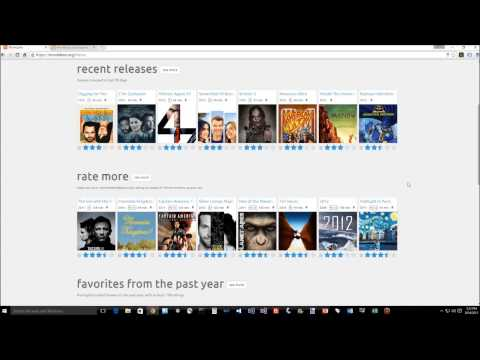

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** 

    1. Alketa Guxha
    
    2. Agustina Maccio
    
    3. Gabrielle Cabebe
    
    4. Felipe Mejias
 
 **Group name:** GAFA

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above


# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


## **Import necessary libraries to perform data analytics on a MovieLens dataset**

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

In [2]:
MOVIE_LENS_HDF5_FILENAME = "movielens.h5"

# Read Users Dataset
user_information = ['user_id', 'gender', 'age', 'occupation', 'zip']
users_dataset = pd.read_table('users.dat', sep = '::', header = None, names = user_information, engine='python')

# Read Ratings Dataset
rating_information = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_dataset = pd.read_table('ratings.dat', sep = '::', header = None, names = rating_information, engine='python')

# Read Movies Dataset
movies_information = ['movie_id', 'title', 'genres']
movies_dataset = pd.read_table('movies.dat', sep = '::', header = None, names = movies_information, engine='python', encoding="ISO-8859-1")

# Merge datasets into a single Pandas Dataframe
movie_lens_dataset = pd.merge(pd.merge(ratings_dataset, users_dataset), movies_dataset)

# Store the data into a HDF5 file
movie_lens_dataset.to_hdf(MOVIE_LENS_HDF5_FILENAME, key = 'df')

# Show first 10 rows of the MovieLens Dataset
movie_lens_dataset.head(10)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


## Report some basic details of the data you collected

### How many movies have an average rating over 4.5 overall?

In [3]:
# Use a pivot table to compute the average rating by movie title
average_movie_ratings = movie_lens_dataset.pivot_table('rating', index = 'title', aggfunc = 'mean')

# Filter movies with an average rating over 4.5
filtered_average_rating = average_movie_ratings.index[average_movie_ratings["rating"] > 4.5]

# Count the number of movies with an average rating over 4.5
number_of_movies = len(average_movie_ratings.loc[filtered_average_rating])
print('Number of movies with an average rating over 4.5 overall is', number_of_movies)

Number of movies with an average rating over 4.5 overall is 21


### How many movies have an average rating over 4.5 among men?  How about women?

In [4]:
# Use a pivot table to compute the average rating by movie title and gender
average_movie_ratings_by_gender = movie_lens_dataset.pivot_table('rating', index = 'title', columns = 'gender', 
                                                                 aggfunc = 'mean')

# Filter movies with an average rating over 4.5 for men
filtered_average_rating_for_men = average_movie_ratings_by_gender.index[average_movie_ratings_by_gender["M"] > 4.5]

# Filter movies with an average rating over 4.5 for women
filtered_average_rating_for_women = average_movie_ratings_by_gender.index[average_movie_ratings_by_gender["F"] > 4.5]

# Count the number of movies with an average rating over 4.5 among men
number_of_movies_for_men = len(average_movie_ratings_by_gender.loc[filtered_average_rating_for_men])
print('Number of movies with an average rating over 4.5 among men is', number_of_movies_for_men)

# Count the number of movies with an average rating over 4.5 among women
number_of_movies_for_women = len(average_movie_ratings_by_gender.loc[filtered_average_rating_for_women])
print('Number of movies with an average rating over 4.5 among women is', number_of_movies_for_women)

Number of movies with an average rating over 4.5 among men is 23
Number of movies with an average rating over 4.5 among women is 51


### How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?

In [5]:
# Filter data by people over age 30
filtered_movie_lens_dataset = movie_lens_dataset.loc[movie_lens_dataset['age'] > 30]

# Use a pivot table to compute the median ratings over 4.5 among people over age 30
median_movie_ratings_by_gender = filtered_movie_lens_dataset.pivot_table('rating',index = 'title', columns = ['gender'], aggfunc = 'median')

# Filter movies with an median rating over 4.5 for men
filtered_median_rating_for_men = median_movie_ratings_by_gender.index[median_movie_ratings_by_gender["M"] > 4.5]

# Filter movies with an median rating over 4.5 for women
filtered_median_rating_for_women = median_movie_ratings_by_gender.index[median_movie_ratings_by_gender["F"] > 4.5]

# Count the number of movies with a median rating over 4.5 among men
number_of_movies_for_men = len(median_movie_ratings_by_gender.loc[filtered_median_rating_for_men])
print('Number of movies with a median rating over 4.5 among men is', number_of_movies_for_men)

# Count the number of movies with a median rating over 4.5 among women
number_of_movies_for_women = len(median_movie_ratings_by_gender.loc[filtered_median_rating_for_women])
print('Number of movies with a median rating over 4.5 among women is', number_of_movies_for_women)

Number of movies with a median rating over 4.5 among men is 86
Number of movies with a median rating over 4.5 among women is 149


### What are the ten most popular movies?
    * Choose what you consider to be a reasonable definition of "popular".
    * Be prepared to defend this choice.

The definition of "popular" that we used is the following:

* The most popular movie for us is the one which has the highest rating, but in the same time the movie which has received more number of rates that the average of all. Thats why we first calculate the average number of total ratings. Then, we filter all the movies with a number of ratings above the average of the total number of rating. 
And lastly we order the movies by average rating value in descendent order and we select the top 10 movies.

In [7]:
# Determine the number of ratings per title and average rating per title
total_number_ratings_and_avg_per_title = movie_lens_dataset.pivot_table('rating', index = 'title', 
                                                                        aggfunc = [len, 'mean'])

# Calculate total number of ratings
total_number_of_ratings = total_number_ratings_and_avg_per_title['len'].sum()

# Determine the average number of total ratings
average_total_number_of_ratings = sum(total_number_of_ratings)/len(total_number_ratings_and_avg_per_title['len'])

# Filter movies with a number of ratings above the average of the total number of rating.
filtered_movies_indexes_by_number_of_ratings = total_number_ratings_and_avg_per_title.index[total_number_ratings_and_avg_per_title['len']['rating'] >= average_total_number_of_ratings]
filtered_movies_by_number_of_ratings = total_number_ratings_and_avg_per_title.loc[filtered_movies_indexes_by_number_of_ratings]

# Order movies by avg rating value
sorted_filtered_movies = filtered_movies_by_number_of_ratings.sort_values([('mean', 'rating')], ascending = False)

# Show top 10 popular movies
popular_movies_title_list = sorted_filtered_movies.head(n = 10).index.tolist()
for index, movie_title in enumerate(popular_movies_title_list):
    print("The popular movie title is: ", movie_title)

The popular movie title is:  Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)
The popular movie title is:  Shawshank Redemption, The (1994)
The popular movie title is:  Godfather, The (1972)
The popular movie title is:  Close Shave, A (1995)
The popular movie title is:  Usual Suspects, The (1995)
The popular movie title is:  Schindler's List (1993)
The popular movie title is:  Wrong Trousers, The (1993)
The popular movie title is:  Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
The popular movie title is:  Raiders of the Lost Ark (1981)
The popular movie title is:  Rear Window (1954)


### Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

1. People over age 18 are the more difficult to please since they have their personalities set and preferences established in general.

2. People who like war movies are easier to please since war movies generally depicts a real story.

3. Children and adolescence (ages 18 and below) would rate Animation and Children's movies higher than other genres compared older people.

4. Children and adolescence are more critical of rating movies in general compared to older people.



In [8]:
#1. People over age 18 are the more difficult to please since they have their personalities set and preferences established in general.

# Filter data by people below age 18 
filtered_movie_lens_dataset_under18 = movie_lens_dataset.loc[movie_lens_dataset['age'] == 1]

# Use a pivot table to compute the median ratings over 4.5 among people below age 18
median_movie_ratings_under18 = filtered_movie_lens_dataset_under18.pivot_table('rating',index = 'title', aggfunc = 'median')

# Filter movies with an median rating over 4.5 
filtered_median_rating = median_movie_ratings_under18.loc[median_movie_ratings_under18['rating'] > 4.5]

# Count the number of movies with a median rating over 4.5 
number_of_movies_under18 = len(filtered_median_rating)
print('Number of movies with a median rating over 4.5 for people under age 18 is', number_of_movies_under18)


# Filter data by people over age 18 
filtered_movie_lens_dataset_over18 = movie_lens_dataset.loc[movie_lens_dataset['age'] > 1]

# Use a pivot table to compute the median ratings over 4.5 among people over age 18
median_movie_ratings_over18 = filtered_movie_lens_dataset_over18.pivot_table('rating',index = 'title', aggfunc = 'median')

# Filter movies with an median rating over 4.5 
filtered_median_rating_over18 = median_movie_ratings_over18.loc[median_movie_ratings_over18['rating'] > 4.5]

# Count the number of movies with a median rating over 4.5 
number_of_movies_over18 = len(filtered_median_rating_over18)
print('Number of movies with a median rating over 4.5 for people over age 18 is', number_of_movies_over18)

Number of movies with a median rating over 4.5 for people under age 18 is 244
Number of movies with a median rating over 4.5 for people over age 18 is 77


In [9]:
#2. People who like war movies are easier to please since war movies generally depicts a real story.

genres_list = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

for genre in genres_list:
    
    # Filter data to get genre movies
    genre_movies = movie_lens_dataset['genres'].str.contains(genre)
    movie_lens_dataset_genre_movies = movie_lens_dataset[genre_movies]


    # Use a pivot table to compute the mean ratings among genre movies
    mean_movie_ratings_genre_movies = movie_lens_dataset_genre_movies.pivot_table('rating', index = 'genres',
                                                                     aggfunc = 'mean')
    display(mean_movie_ratings_genre_movies.head())
    genre_mean = mean_movie_ratings_genre_movies.mean()

    #mean of all genre movies
    print('The mean rating for %s movies is %f' % (genre, genre_mean))


,rating
genres,
Action,3.354886
Action|Adventure,3.676814
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926


The mean rating for Action movies is 3.260802


,rating
genres,
Action|Adventure,3.676814
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926
Action|Adventure|Children's,1.318182


The mean rating for Adventure movies is 3.274294


,rating
genres,
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926
Action|Animation|Children's|Sci-Fi|Thriller|War,3.380952
Adventure|Animation|Children's,2.993750


The mean rating for Animation movies is 3.522116


,rating
genres,
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Children's,1.318182
Action|Adventure|Children's|Comedy,2.306950
Action|Adventure|Children's|Fantasy,2.090909
Action|Adventure|Children's|Sci-Fi,1.874286


The mean rating for Children's movies is 3.099094


,rating
genres,
Action|Adventure|Children's|Comedy,2.306950
Action|Adventure|Comedy,3.095330
Action|Adventure|Comedy|Crime,3.137194
Action|Adventure|Comedy|Horror,3.826642
Action|Adventure|Comedy|Horror|Sci-Fi,3.804233


The mean rating for Comedy movies is 3.361018


,rating
genres,
Action|Adventure|Comedy|Crime,3.137194
Action|Adventure|Crime,2.925349
Action|Adventure|Crime|Drama,3.600978
Action|Adventure|Crime|Thriller,2.782407
Action|Comedy|Crime,3.756098


The mean rating for Crime movies is 3.544470


,rating
genres,
Comedy|Documentary,3.915828
Documentary,3.960734
Documentary|Drama,3.773810
Documentary|Musical,3.267327
Documentary|War,3.972527


The mean rating for Documentary movies is 3.778045


,rating
genres,
Action|Adventure|Crime|Drama,3.600978
Action|Adventure|Drama,3.269629
Action|Adventure|Drama|Romance,2.950276
Action|Adventure|Drama|Sci-Fi|War,4.292977
Action|Adventure|Drama|Thriller,3.422886


The mean rating for Drama movies is 3.622997


,rating
genres,
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Children's|Fantasy,2.090909
Action|Adventure|Fantasy,3.220211
Action|Adventure|Fantasy|Sci-Fi,3.904041
Action|Children's|Fantasy,2.389517


The mean rating for Fantasy movies is 3.225283


,rating
genres,
Adventure|Animation|Film-Noir,3.679822
Comedy|Film-Noir|Thriller,2.000000
Crime|Drama|Film-Noir,3.687179
Crime|Drama|Film-Noir|Thriller,4.082430
Crime|Film-Noir,4.264129


The mean rating for Film-Noir movies is 3.941957


,rating
genres,
Action|Adventure|Animation|Horror|Sci-Fi,3.546926
Action|Adventure|Comedy|Horror,3.826642
Action|Adventure|Comedy|Horror|Sci-Fi,3.804233
Action|Adventure|Horror,3.378364
Action|Adventure|Horror|Thriller,3.321748


The mean rating for Horror movies is 3.283152


,rating
genres,
Action|Comedy|Musical,3.718651
Action|Comedy|Musical|Sci-Fi,2.614525
Adventure|Animation|Children's|Comedy|Musical,3.279318
Adventure|Animation|Children's|Musical,3.290441
Adventure|Children's|Comedy|Musical,3.148438


The mean rating for Musical movies is 3.498672


,rating
genres,
Action|Adventure|Mystery,3.424449
Action|Adventure|Mystery|Sci-Fi,2.238938
Action|Crime|Mystery,3.076000
Action|Crime|Mystery|Thriller,2.745455
Action|Drama|Mystery,3.175393


The mean rating for Mystery movies is 3.483027


,rating
genres,
Action|Adventure|Comedy|Romance,3.862448
Action|Adventure|Drama|Romance,2.950276
Action|Adventure|Romance,3.418955
Action|Adventure|Romance|Sci-Fi|War,4.022893
Action|Adventure|Romance|Thriller,3.023490


The mean rating for Romance movies is 3.503558


,rating
genres,
Action|Adventure|Animation|Horror|Sci-Fi,3.546926
Action|Adventure|Children's|Sci-Fi,1.874286
Action|Adventure|Comedy|Horror|Sci-Fi,3.804233
Action|Adventure|Comedy|Sci-Fi,3.739953
Action|Adventure|Drama|Sci-Fi|War,4.292977


The mean rating for Sci-Fi movies is 3.345918


,rating
genres,
Action|Adventure|Crime|Thriller,2.782407
Action|Adventure|Drama|Thriller,3.422886
Action|Adventure|Horror|Thriller,3.321748
Action|Adventure|Romance|Thriller,3.023490
Action|Adventure|Sci-Fi|Thriller,3.349232


The mean rating for Thriller movies is 3.491435


,rating
genres,
Action|Adventure|Comedy|War,2.276995
Action|Adventure|Drama|Sci-Fi|War,4.292977
Action|Adventure|Romance|Sci-Fi|War,4.022893
Action|Adventure|Romance|War,4.251656
Action|Adventure|Sci-Fi|Thriller|War,2.931034


The mean rating for War movies is 3.618775


,rating
genres,
Action|Adventure|Western,2.976077
Action|Comedy|Western,3.744289
Action|Drama|Western,2.906250
Action|Sci-Fi|Thriller|Western,3.421384
Action|Sci-Fi|Western,2.158537


The mean rating for Western movies is 3.458767


In [10]:
#3. Children and adolescence (ages 18 and below) would rate Animation and Children's movies higher than other genres compared older people.

ratings_age = movie_lens_dataset.pivot_table("rating", index="genres", columns=["age"], aggfunc="mean")

mean_rating_animation_18 = ratings_age.loc["Animation",:].values[0]
print("The mean rating for Animated movies for those 18 and under is " + "%1.2f"%(mean_rating_animation_18) + ", which was the lowest mean rating compared to other age groups.")

mean_rating_childrens_18 = ratings_age.loc["Children's",:].values[0]
print("\nThe mean rating for Children's movies for those 18 and under is " + "%1.2f"%(mean_rating_childrens_18) + ", which was the lowest mean rating compared to other age groups.")

The mean rating for Animated movies for those 18 and under is 3.84, which was the lowest mean rating compared to other age groups.

The mean rating for Children's movies for those 18 and under is 2.61, which was the lowest mean rating compared to other age groups.


# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie received.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

### Plot a histogram of the ratings of all movies

,title
rating,
1,56174
2,107557
3,261197
4,348971
5,226310


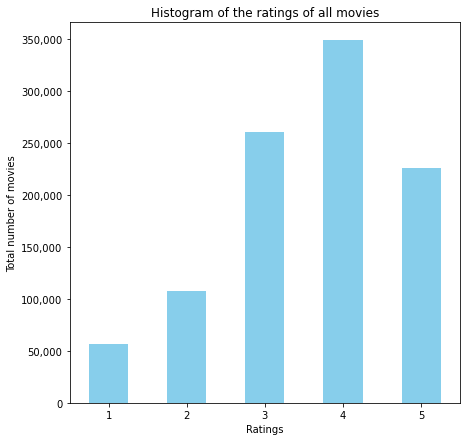

In [12]:
movies_rating = movie_lens_dataset.pivot_table('title', index = 'rating', aggfunc = 'count')
movies_plot = movies_rating.plot(kind = 'bar', rot = 0, legend = False, color = 'skyblue', figsize = (7, 7))

# Format the total number of movies
movies_plot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Set title and Plot Axis
plt.title('Histogram of the ratings of all movies')
plt.ylabel('Total number of movies')
plt.xlabel('Ratings')
movies_rating.head(20)

### Plot a histogram of the number of ratings each movie received

Text(0.5, 0, 'Number of Ratings')

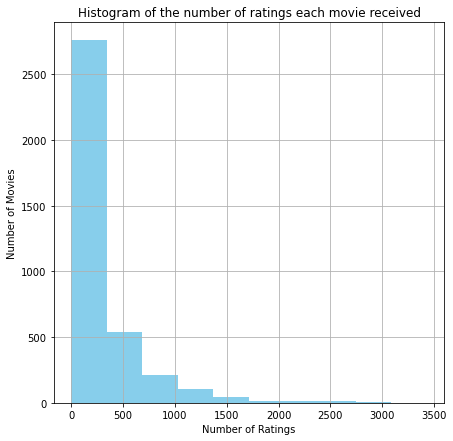

In [13]:
number_of_ratings_per_movie = movie_lens_dataset.pivot_table('rating', index = 'title', aggfunc = 'count')
number_of_ratings_per_movie.hist(color = 'skyblue', figsize = (7, 7))

# Set title and Plot Axis
plt.title('Histogram of the number of ratings each movie received')
plt.ylabel('Number of Movies')
plt.xlabel('Number of Ratings')

### Plot a histogram of the average rating for each movie

Text(0.5, 0, 'Average Rating')

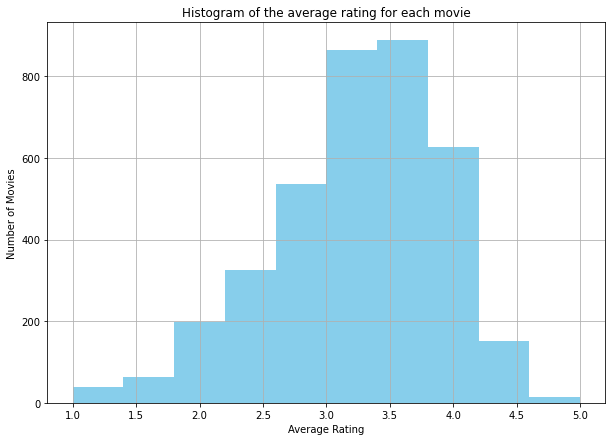

In [16]:
average_rating_for_each_movie = movie_lens_dataset.pivot_table('rating', index = 'title', aggfunc = 'mean')
average_rating_for_each_movie.hist(color = 'skyblue', figsize = (10, 7))

# Set title and Plot Axis
plt.title('Histogram of the average rating for each movie')
plt.ylabel('Number of Movies')
plt.xlabel('Average Rating')

### Plot a histogram of the average rating for movies which are rated more than 100 times

- What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?

The histogram of all movies is more center skewed than the one where we use the ones rated more than 100 times. This means that the data is more centered distributed on the all movies one compared with the other one.

- Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?

The ones that received more than 100 rates are more trustful since we have a variety of people who shared their opinion. Also the histogram shows a left-skewed distribution which mean that most of the movies rated more than 100 times have higher ratings.


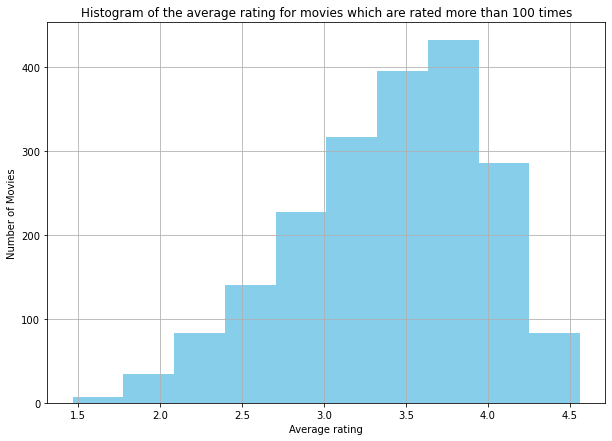

In [22]:
# Determine the number of ratings per title and average rating per title
total_number_ratings_and_avg_per_title = movie_lens_dataset.pivot_table('rating', index = 'title', 
                                                                        aggfunc = [len, 'mean'])

# Filter movies with a number of ratings above the average of the total number of ratings
filtered_movies_indexes_by_number_of_ratings = total_number_ratings_and_avg_per_title.index[total_number_ratings_and_avg_per_title['len']['rating'] > 100]
filtered_movies_by_number_of_ratings = total_number_ratings_and_avg_per_title.loc[filtered_movies_indexes_by_number_of_ratings]
filtered_movies_by_number_of_ratings['mean'].hist(color = 'skyblue', figsize = (10, 7))

# Set title and Plot Axis
plt.title('Histogram of the average rating for movies which are rated more than 100 times')
plt.ylabel('Number of Movies')
plt.xlabel('Average rating')

# What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
print("- What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?")
print("\nThe histogram of all movies is more center skewed than the one where we use the ones rated more than 100 times. This means that the data is more centered distributed on the all movies one compared with the other one.\n")

# Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?
print("- Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?")
print("\nThe ones that received more than 100 rates are more trustful since we have a variety of people who shared their opinion. Also the histogram shows a left-skewed distribution which mean that most of the movies rated more than 100 times have higher ratings.")

### Make some conjectures about the distribution of ratings? Support your answers with data!

### Conjecture 1: Children and adolescence are more critical of rating movies in general compared to older people.

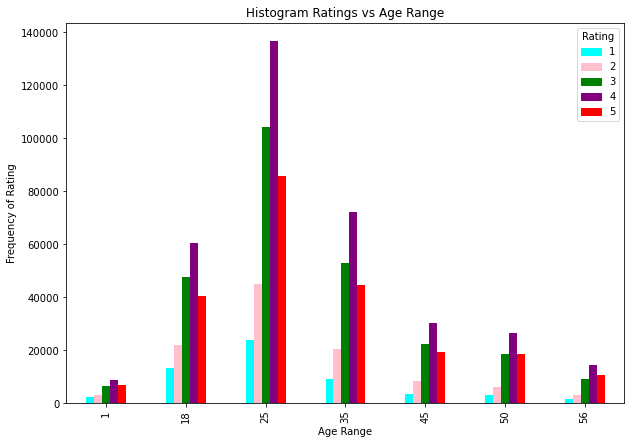

In [74]:
age_rating = movie_lens_dataset.pivot_table(index=["age", "rating"], aggfunc="count")
age_rating = age_rating.drop(["gender", "genres", "occupation", "timestamp", "title", "user_id", "zip"], axis=1)


age_rating.unstack().plot.bar(legend=True, color=["cyan","pink","green","purple","red"], figsize=(10,7))
plt.title("Histogram Ratings vs Age Range")
plt.xlabel("Age Range")
plt.ylabel("Frequency of Rating")

colors = ["cyan","pink","green","purple","red"]       
labels = [1, 2, 3 , 4, 5]
handles = [plt.Rectangle((0,0),1,1, color=colors[label-1]) for label in labels]
plt.legend(handles, labels, title = "Rating")

### Conjecture 2: Is the total number of ratings affected based on gender? 

The % of the ratings given by Men vs Women is very similar, this mean that there is no influence based on the gender when comes to rating.

Rating comparison of Men vs Women:


rating,1,2,3,4,5
gender,,,,,
F,13347,24548,62966,87033,58546
M,42827,83009,198231,261938,167764



Normalized rating comparison of Men vs Women:


rating,1,2,3,4,5
gender,,,,,
F,0.054159,0.099610,0.255502,0.353161,0.237567
M,0.056817,0.110125,0.262986,0.347504,0.222567


Text(0.5, 0, 'Gender')

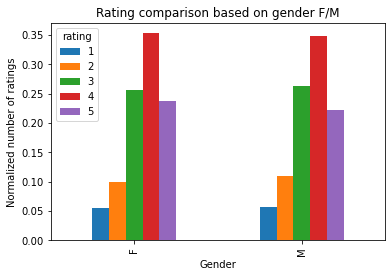

In [6]:
# Rating comparison based on gender F/M 
count_per_gender = movie_lens_dataset.pivot_table('title', index = 'gender', columns = 'rating', aggfunc = 'count')
print("Rating comparison of Men vs Women:")
display(count_per_gender)

# Normalize Rating comparison based on gender F/M  
count_per_gender_norm = count_per_gender.div(count_per_gender.sum(1).astype(float), axis=0)
print("\nNormalized rating comparison of Men vs Women:")
display(count_per_gender_norm)

# Plot Rating comparison based on gender F/M 
count_per_gender_norm.plot(kind='bar')
plt.title('Rating comparison based on gender F/M')
plt.ylabel('Normalized number of ratings')
plt.xlabel('Gender')

### Conjecture 3: Users have a positive bias in general, with average ratings above the mid-point of 2.5 since users frequently leave movies they don't like halfway through, and don't bother to rate them

<ipython-input-3-c961307074e8>:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  values, base = np.histogram(avg_ratings_per_user, bins=40, normed=True)


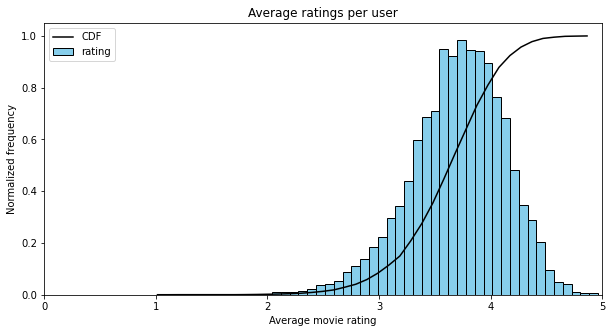

In [3]:
# Determine the number of ratings per title and average rating per title
avg_ratings_per_user = movie_lens_dataset.pivot_table('rating', index = 'user_id', 
                                                                        aggfunc = 'mean')


# Plot histogram
avg_ratings_per_user.plot(kind='hist', bins=50, grid=0, density=True, color='skyblue', edgecolor='black', figsize=(10,5))

# evaluate the histogram
values, base = np.histogram(avg_ratings_per_user, bins=40, normed=True)

# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()

# Plot the Cumulative Distribution Function
plt.plot(base[:-1], cumulative, c='black', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

### Conjecture 4: Over the years, the number of people involved in ranking movies has increased, most likely due to the ease of doing it on a virtual platform as opposed to traditional methods. Having a larger database of user preferences (based on ratings) allows companies such as Netflix to make decisions like which movie will be the next hot movie to be released.

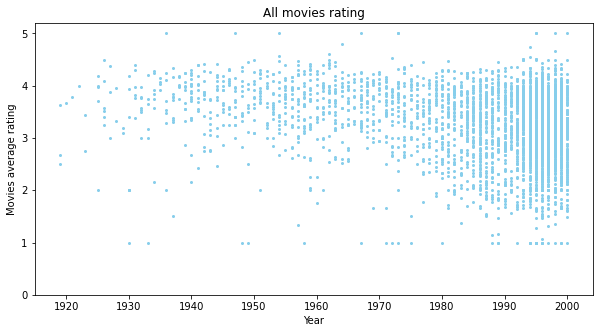

In [5]:
#Split title and release year in separate columns in movies dataframe
movies = movie_lens_dataset
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]

#Average rating for yeach user over time
movie_lens_dataset_with_years = movies[['rating', 'year', 'movie_id']].groupby('movie_id').mean()

# Creates scatter plot
plt.figure(figsize=(10,5))
plt.plot(movie_lens_dataset_with_years.year, movie_lens_dataset_with_years.rating,"g.", markersize=4, c = "skyblue")
plt.xlabel('Year')
plt.ylabel('Movies average rating')
plt.title('All movies rating')
plt.ylim(0,)
plt.show()

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

### Make a scatter plot of men versus women and their mean rating for every movie

Text(0.5, 0, 'Average men rating for every movie')

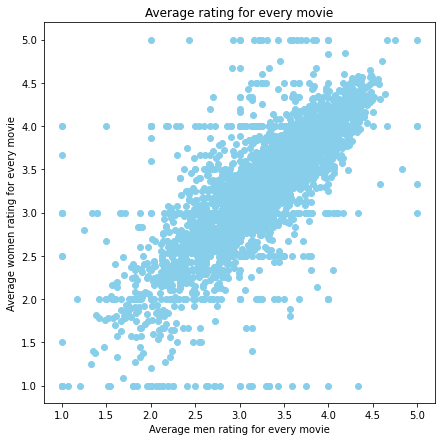

In [17]:
# Use a pivot table to compute the average rating by movie title and gender
average_movie_ratings_by_gender = movie_lens_dataset.pivot_table('rating', index = 'title', columns = 'gender', 
                                                                 aggfunc = 'mean')

# Creates scatter plot
plt.rcParams["figure.figsize"] = (7, 7)
plt.scatter(average_movie_ratings_by_gender['M'], average_movie_ratings_by_gender['F'], c = ["skyblue"])
plt.title('Average rating for every movie')
plt.ylabel('Average women rating for every movie')
plt.xlabel('Average men rating for every movie')

### Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times

Text(0.5, 0, 'Average male rating')

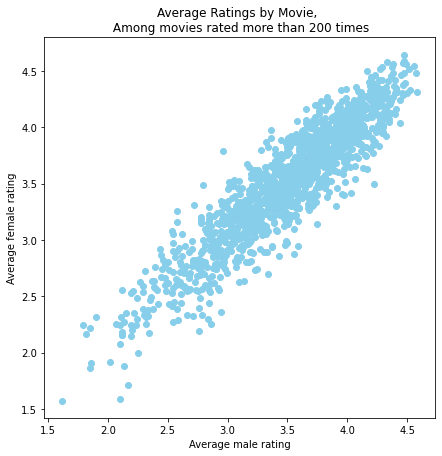

In [18]:
# Determine the number of ratings and average rating per title and gender
total_number_ratings_and_avg_by_title = movie_lens_dataset.pivot_table('rating', index = 'title', columns = 'gender',
                                                                        aggfunc = [len, 'mean'])

# Filter movies rated more than 200
filtered_movies_indexes_by_number_of_ratings = total_number_ratings_and_avg_by_title.index[total_number_ratings_and_avg_by_title['len']['F'] + total_number_ratings_and_avg_by_title['len']['M'] > 200]
filtered_movies_by_number_of_ratings = total_number_ratings_and_avg_by_title.loc[filtered_movies_indexes_by_number_of_ratings]

# Creates scatter plot
plt.rcParams["figure.figsize"] = (7, 7)
plt.scatter(filtered_movies_by_number_of_ratings['mean']['M'], filtered_movies_by_number_of_ratings['mean']['F'], c = ["skyblue"])
plt.title('Average Ratings by Movie, \n Among movies rated more than 200 times')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

### Compute the correlation coefficient between the ratings of men and women

In [19]:
# Use a pivot table to compute the average rating by movie title and gender
average_movie_ratings_by_gender = movie_lens_dataset.pivot_table('rating', index = 'title', columns = 'gender', 
                                                                 aggfunc = 'mean')

# Calculate correlation coefficient
correlation_coefficient = average_movie_ratings_by_gender.M.corr(average_movie_ratings_by_gender.F)
print("The correlation coefficient between the ratings of men and women is: ", correlation_coefficient)

The correlation coefficient between the ratings of men and women is:  0.7631898908583273


#### What do you observe?


A strong positive linear relationship.

#### Are the ratings similar or not? Support your answer with data!

- Are the ratings similar or not?
Yes, the relationship between them is linear positive.


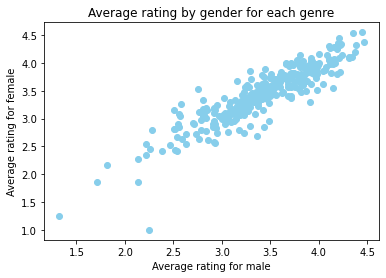

In [33]:
gender_genre_rating = movie_lens_dataset.pivot_table('rating', index = 'genres', columns = 'gender', 
                                                     aggfunc = 'mean')
plt.scatter(gender_genre_rating['M'], gender_genre_rating['F'], c=['skyblue'])
plt.title('Average rating by gender for each genre')
plt.ylabel('Average rating for female')
plt.xlabel('Average rating for male')

print("- Are the ratings similar or not?")
print("Yes, the relationship between them is linear positive.")

### Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
For example, are men and women more similar when they are younger or older?
Be sure to come up with your own conjectures and support them with data!

### Conjecture 1: Are men and women more similar when they share the same occupation?

Average Movie Rating by Occupation


gender,F,M
occupation,,
0,3.686842,3.487125
1,3.584606,3.571737
2,3.555888,3.581192
3,3.687679,3.630709
4,3.547252,3.533348
5,3.584891,3.527222
6,3.690834,3.641861
7,3.668559,3.585641
8,3.363208,3.498551


The correlation coefficient between average male and female ratings by occupation is:  0.4374313756459885


Text(0.5, 0, 'Average rating for male')

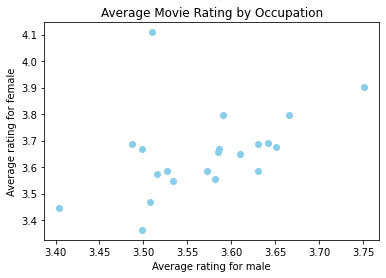

In [68]:
# Calculate the mean rating by gender and occupation
movie_preference_by_occupation = movie_lens_dataset.pivot_table('rating', index = 'occupation', columns = 'gender', aggfunc = 'mean')
print("Average Movie Rating by Occupation")
display(movie_preference_by_occupation)

# Correlation coefficient of the movie rating by occupation.
correlation_coefficient = movie_preference_by_occupation.M.corr(movie_preference_by_occupation.F)
print("The correlation coefficient between average male and female ratings by occupation is: ", correlation_coefficient)

# Plot a scatter plot of the movie rating by occupation
plt.scatter(movie_preference_by_occupation['M'], movie_preference_by_occupation['F'], c = ['skyblue'])
plt.title('Average Movie Rating by Occupation')
plt.ylabel('Average rating for female')
plt.xlabel('Average rating for male')

### Conjecture 2: Are men and women more similar when they rate the same genre?

gender,F,M
genres,,
Action,3.367474,3.352991
Action|Adventure,3.701213,3.671115
Action|Adventure|Animation,3.843750,4.217082
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638
Action|Adventure|Animation|Horror|Sci-Fi,3.422535,3.563071
...,...,...
Sci-Fi|Thriller|War,3.450000,3.437500
Sci-Fi|War,4.376623,4.464789
Thriller,3.563776,3.553364


The correlation coefficient between average male and female ratings by genre is:  0.9015390283729002


Text(0.5, 0, 'Average rating for male')

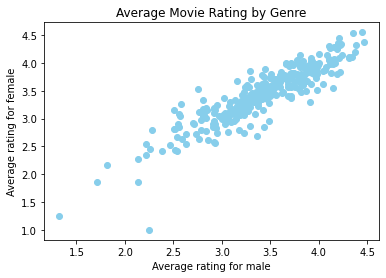

In [71]:
movie_preference_by_genre = movie_lens_dataset.pivot_table('rating', index = 'genres', columns = 'gender', aggfunc = 'mean')
display(movie_preference_by_genre)

# Correlation coefficient of the movie rating by genre.
correlation_coefficient = movie_preference_by_genre.M.corr(movie_preference_by_genre.F)
print("The correlation coefficient between average male and female ratings by genre is: ", correlation_coefficient)

# Plot a scatter plot of the movie rating by genre
plt.scatter(movie_preference_by_genre['M'], movie_preference_by_genre['F'], c = ['skyblue'])
plt.title('Average Movie Rating by Genre')
plt.ylabel('Average rating for female')
plt.xlabel('Average rating for male')

### Conjecture 3: Are men and women more similar when they are in the same age group?

gender,F,M
age,,
1,3.616291,3.517461
18,3.453145,3.525476
25,3.606700,3.526780
35,3.659653,3.604434
45,3.663044,3.627942
50,3.797110,3.687098
56,3.915534,3.720327


The correlation coefficient between average male and female ratings by genre is:  0.90127597368019


Text(0.5, 0, 'Average rating for male')

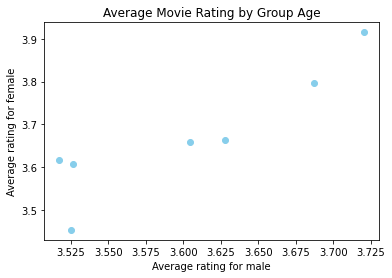

In [7]:
movie_preference_by_group_age = movie_lens_dataset.pivot_table('rating', index = ['age'], columns = 'gender', aggfunc = 'mean')
display(movie_preference_by_group_age)

# Correlation coefficient of the movie rating by genre.
correlation_coefficient = movie_preference_by_group_age.M.corr(movie_preference_by_group_age.F)
print("The correlation coefficient between average male and female ratings by genre is: ", correlation_coefficient)

# Plot a scatter plot of the movie rating by genre
plt.scatter(movie_preference_by_group_age['M'], movie_preference_by_group_age['F'], c = ['skyblue'])
plt.title('Average Movie Rating by Group Age')
plt.ylabel('Average rating for female')
plt.xlabel('Average rating for male')

# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer. 
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**


####  Conjecture 1.1 would be provide the insight that a movie company could cater to audience for ages 18 and under. The data shows that there are 167 more people ages 18 and under had a median rating of 4.5 or higher for each movie compared to everyone else older than 18. Additionally, with the data from conjecture 2, the movie company can show mostly Film-Noir movies, as that genre had the highest mean rating compared to other genres. Overall, conjectures 1.1 and 1.2 can tell a movie company to show Film-Noir movies to audiences 18 and under.

#### The data from conjectures 1.3 and 1.4 can be used in tandem to provide insights to a movie company as well. The data from conjecture 1.3 showed the opposite expected results; children and adolescence audiences gave the lowest ratings for Children's and Animated films compared to those over 18. Conjecture 4 showed the same histogram shape for ratings amongst each age group, but a movie company can use this information to focus on an audience from ages 25-34, since they are the ones that watch and rate movies the most compared to other age groups. The Data from conjecture 2 can also tell the movie company to show Film Noir movies to this age group.

#### Business question the data can answer: "Which age group should we focus on and what movie genre(s) should we use to please our audience?"


# Report: communicate the results (15 points) 

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

Here's the link to the Word doc of the Report! I will be working on this over the next couple of days:
https://wpi0-my.sharepoint.com/:w:/g/personal/gcabebe_wpi_edu/Efb0Hj16g_xNg9jFezhHN3UBMGkfqDy2uoZF3jN0K48IJQ?e=XBbR24

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you. 

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Two teams will be randomly chosen to present in the class.

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**